Zomato Data Analysis!

In [49]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

Importing the data

In [50]:
df = pd.read_csv("zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

Data Cleaning & Data Preprocessing

In [51]:
#convert the data type of column -rate
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float (value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [52]:
#for checking the data summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [53]:
#type of restaurants 
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Data Visualization

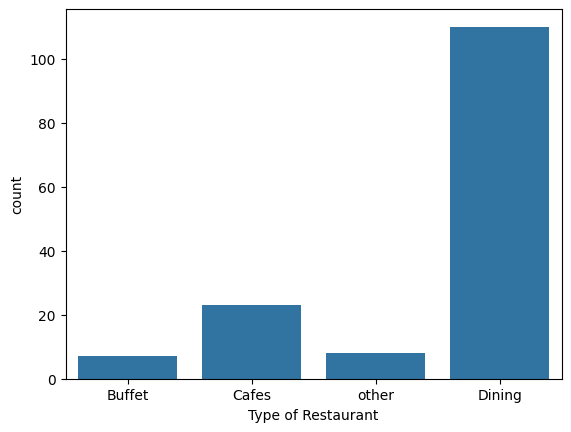

In [54]:
#for finding category of restro-
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.show()


Text(0, 0.5, 'Votes')

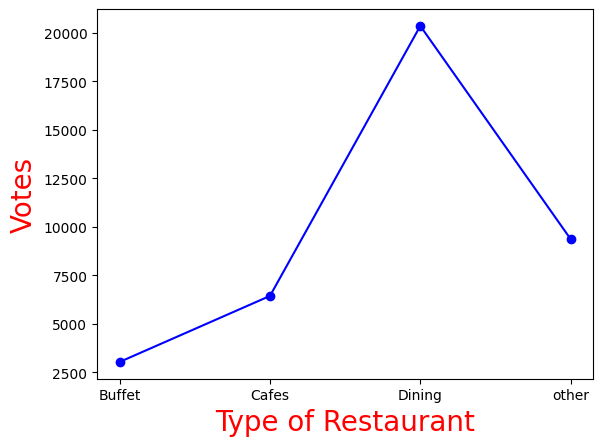

In [55]:
#for finding which category of restro- received maximum votes  
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = "blue", marker = "o")
plt.xlabel("Type of Restaurant", c = "red", size = 20)
plt.ylabel("Votes", c = "red", size = 20)

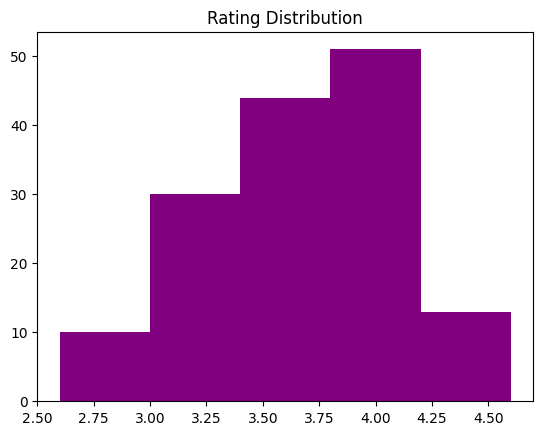

In [56]:
#rating distribution for the restro- 
plt.hist(df['rate'], bins = 5, color = "purple")
plt.title("Rating Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

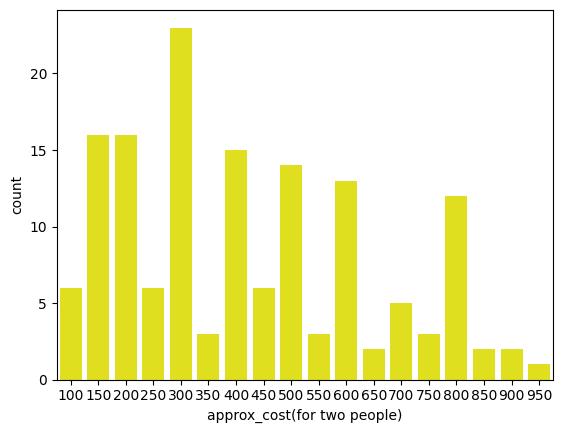

In [57]:
#for displaying how much two people or couple spend while ordering
two_people = df['approx_cost(for two people)']
sns.countplot(x=two_people, color="yellow")


<Axes: xlabel='online_order', ylabel='rate'>

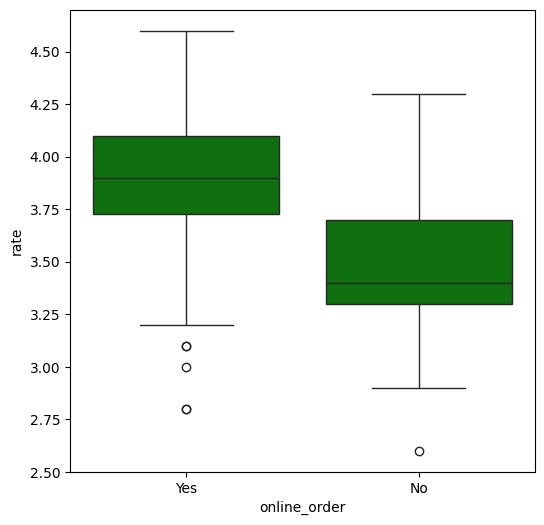

In [58]:
#which mode received maximum rating
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'online_order', y = 'rate', data = df, color = 'green')

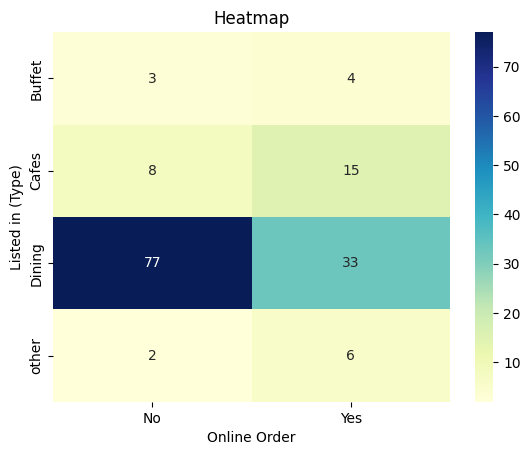

In [59]:
#shows type of restro- receives offline orders
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

Anomaly detection

In [60]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [61]:
# Selecting relevant numerical features and scaling
features = df[['votes', 'rate', 'approx_cost(for two people)']].dropna()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [62]:
# Applying Isolation Forest for anomaly detection (Isolation Forest- Detects anomalies based on data distribution.)
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
features['anomaly'] = isolation_forest.fit_predict(features_scaled)
features['anomaly'] = features['anomaly'].map({-1: 'Anomaly', 1: 'Normal'})

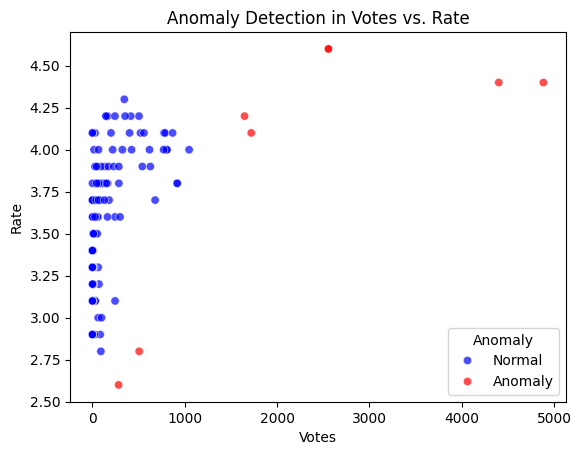

In [ ]:
# Visualizing the anomalies
sns.scatterplot(
    x=features['votes'],
    y=features['rate'],
    hue=features['anomaly'],
    palette={'Normal': 'blue', 'Anomaly': 'red'},
    alpha=0.7
)
plt.title('Anomaly Detection in Votes vs. Rate')
plt.xlabel('Votes')
plt.ylabel('Rate')
plt.legend(title='Anomaly')
plt.show()


Insights Generation

In [64]:
# Average cost & rating by each restaurant type
avg_stats = df.groupby('listed_in(type)')[['rate', 'approx_cost(for two people)']].mean()
print("Average Rating and Cost by Restaurant Type:\n", avg_stats.sort_values('rate', ascending=False))

Average Rating and Cost by Restaurant Type:
                      rate  approx_cost(for two people)
listed_in(type)                                       
other            3.912500                   668.750000
Buffet           3.842857                   671.428571
Cafes            3.765217                   545.652174
Dining           3.571818                   357.272727


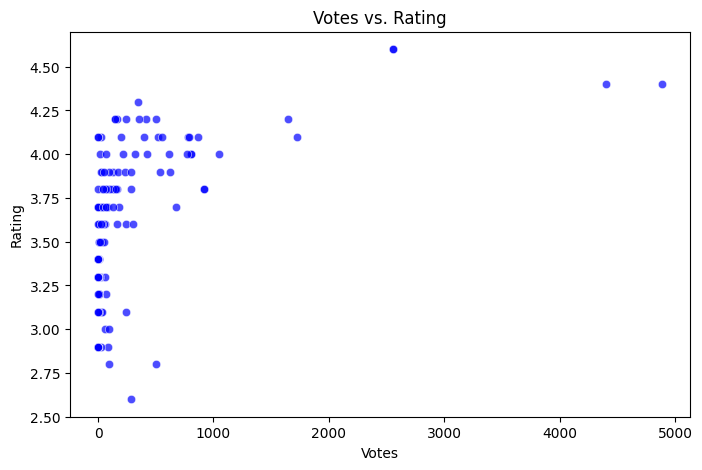

In [65]:
# Relationship between votes and rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.7, color="blue")
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

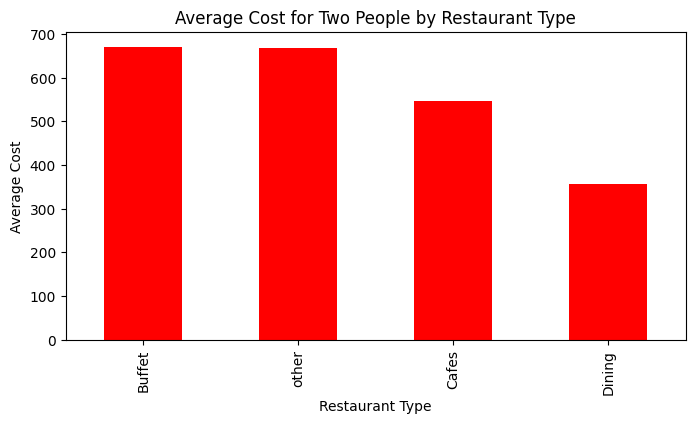

In [66]:
# Visualizing average cost
avg_stats['approx_cost(for two people)'].sort_values(ascending=False).plot(kind='bar', color='red', figsize=(8, 4))
plt.title('Average Cost for Two People by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost')
plt.show()

Hypothesis Testing

In [67]:
#Hypothesis testing1- for Online vs Offline Order Ratings
#t-test is used here to differentiate between two independent groups
t_stat1, p_val1 = ttest_ind(
    df[df['online_order'] == 'Yes']['rate'].dropna(),
    df[df['online_order'] == 'No']['rate'].dropna(),
    equal_var=False
)
print(f"Hypothesis 1 - Online Order Ratings:\nT-statistic={t_stat1:.2f}, P-value={p_val1:.4f}")

#Hypothesis testing2- for Dining vs Other Votes
t_stat2, p_val2 = ttest_ind(
    df[df['listed_in(type)'] == 'Casual Dining']['votes'],
    df[df['listed_in(type)'] != 'Casual Dining']['votes'],
    equal_var=False
)
print(f"Hypothesis 2 - Dining Votes:\nT-statistic={t_stat2:.2f}, P-value={p_val2:.4f}")


Hypothesis 1 - Online Order Ratings:
T-statistic=6.01, P-value=0.0000
Hypothesis 2 - Dining Votes:
T-statistic=nan, P-value=nan
